In [438]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

# pipeline setup

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [439]:
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase3_project\\data\\H1N1_Flu_Vaccines.csv"
project3_raw_df = pd.read_csv(file_path)


# Identifying Features and Target and investigate the non vaccinate group.

Once the data is loaded into a pandas dataframe, the next step is identifying which columns represent features and which column represents the target.
In the cell below, assign X to be the features and y to be the target. Remember that X should not contain the target.

In [440]:
project3_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Data Undestanding and Identifying Features and Target

Once the data is loaded into a pandas dataframe, the next step is identifying which columns represent features and which column represents the target. In this project, we are going to focus on predicting whether people got H1N1 vaccine using data collected in the National 2009 H1N1 Flu Survey which can be found from this link https://www.kaggle.com/datasets/arashnic/flu-data.
In the cell below, assign X to be the features and y to be the target, which is project3_raw_2_df['h1n1_vaccine']. Also, this is not an extremely inbalanced dataset, around 78% of the responses is not vaccinated. For all binary variables: 0 = No; 1 = Yes.

There is 26707 total rows of data. There is 36 columns of features. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below. In this data set, seasonal flu study is also surveyed. Since we are focused on H1N1 vaccination, those data are not going to be used n be dropped.

Here are the data libarary for each feature.

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
behavioral_antiviral_meds - Has taken antiviral medications. (binary)
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
behavioral_face_mask - Has bought a face mask. (binary)
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
health_worker - Is a healthcare worker. (binary)
health_insurance - Has health insurance. (binary)
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
age_group - Age group of respondent.
education - Self-reported education level.
race - Race of respondent.
sex - Sex of respondent.
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
marital_status - Marital status of respondent.
rent_or_own - Housing situation of respondent.
employment_status - Employment status of respondent.
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.
household_children - Number of children in household, top-coded to 3.
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [441]:
print(project3_raw_df["h1n1_vaccine"].value_counts())
print()
print("Percentages")
print(project3_raw_df["h1n1_vaccine"].value_counts(normalize=True))

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Percentages
0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64


In [442]:
y = project3_raw_df['h1n1_vaccine']
X = project3_raw_df.drop(columns=['h1n1_vaccine'], axis=1)

In [443]:
project3_raw_df['h1n1_vaccine'].value_counts()


0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

EDA analysis-
Let's check on the mean and standard deviation for the vaccination group and the unvaccination group.

In [444]:
aggs = project3_raw_df.groupby('h1n1_vaccine').agg(['mean', 'std'])
aggs

C:\Users\eggfr\AppData\Local\Temp\ipykernel_18008\273236371.py:1: FutureWarning: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggs = project3_raw_df.groupby('h1n1_vaccine').agg(['mean', 'std'])


respondent_id              h1n1_concern           h1n1_knowledge  \
                      mean          std         mean       std           mean   
h1n1_vaccine                                                                    
0             13366.133885  7704.999816     1.560815  0.910159       1.224653   
1             13304.313888  7728.011741     1.832096  0.878564       1.402866   

                       behavioral_antiviral_meds            \
                   std                      mean       std   
h1n1_vaccine                                                 
0             0.615697                  0.044305  0.205776   
1             0.606937                  0.065722  0.247817   

             behavioral_avoidance            ... opinion_seas_risk            \
                             mean       std  ...              mean       std   
h1n1_vaccine                                 ...                               
0                        0.714546  0.451641  ...          2.533000  1.345229   
1                        0.766531  0.423076  ...          3.408112  1.310792   

             opinion_seas_sick_from_vacc           household_adults            \
                                    mean       std             mean       std   
h1n1_vaccine                                                                    
0                               2.112314  1.322829         0.883542  0.760436   
1                               2.139527  1.369590         0.897427  0.726876   

             household_children           seasonal_vaccine            
                           mean       std             mean       std  
h1n1_vaccine                                                          
0                      0.536186  0.930711         0.367898  0.482245  
1                      0.528660  0.918794         0.827811  0.377578  

[2 rows x 50 columns]

In [445]:
filt = project3_raw_df['h1n1_vaccine'] == 0
project3_raw_df.loc[filt]['h1n1_concern'].value_counts()

2.0    8102
1.0    6756
3.0    3250
0.0    2849
Name: h1n1_concern, dtype: int64

Text(0.5, 1.0, 'H1N1 concern level vs people not vaccinated')

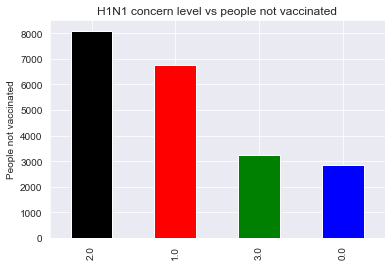

In [446]:
ax = project3_raw_df.loc[filt]['h1n1_concern'].value_counts().plot(kind = 'bar',color=['black', 'red', 'green', 'blue'])
#ax.set_xlabel("H1N1_ concern level")
ax.set_ylabel("People not vaccinated")
ax.set_title("H1N1 concern level vs people not vaccinated")

In [447]:
filt = project3_raw_df['h1n1_vaccine'] == 0
project3_raw_df.loc[filt]['education'].value_counts()

College Graduate    7614
Some College        5579
12 Years            4726
< 12 Years          1968
Name: education, dtype: int64

Text(0.5, 1.0, 'Education level vs vaccination')

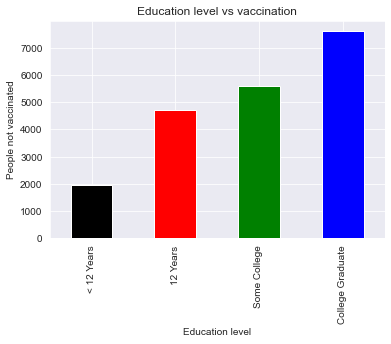

In [448]:
ax = project3_raw_df.loc[filt]['education'].value_counts().sort_values().plot(kind = 'bar',color=['black', 'red', 'green', 'blue'])
ax.set_xlabel("Education level")
ax.set_ylabel("People not vaccinated")
ax.set_title("Education level vs vaccination")

In [449]:
unvac_df = project3_raw_df.loc[filt]

# Train/Test Split

Separating data into training and testing sets is an important part of evaluating the models.Most of the data is used for training, and a smaller portion of the data is used for testing. For this analysis: we only split data into train and test. 75% of the data is for training and 25% for test. Also, the data split happened before we even do any EDA analysis to prevent data leakage. There is 20030 row of datas for the train set and 6677 rows of the data for test set before any data cleaning or analysis is done.

In [450]:
#create train-test set using 75%-25% ratio for the train set and test set and set the random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20030, 37), (6677, 37), (20030,), (6677,))

# Data preprocessing and imputing missing value for data

There is no duplication for the train set and test set.

In [451]:
x_train.duplicated().sum()

0

In [452]:
x_test.duplicated().sum()

0

# Impute missing value with most frequent value or mean when the feature has lass than 5% of missing data. 

Let's check which features has missing value. For any column that has missing value with less than 1100 (~5% of the data), we are going to impute it with most frequent value for categorical variables and mean for numerical variables in the pipeline. We need to have different different strategy for health_insurance,income_poverty,doctor_recc_h1n1,employment_occupation,employment_industry

In [453]:
x_train.isnull().sum().sort_values(ascending=False)

employment_occupation          10074
employment_industry             9974
health_insurance                9233
income_poverty                  3269
doctor_recc_h1n1                1635
doctor_recc_seasonal            1635
rent_or_own                     1512
employment_status               1081
education                       1040
marital_status                  1038
chronic_med_condition            717
child_under_6_months             605
health_worker                    597
opinion_seas_sick_from_vacc      407
opinion_seas_risk                387
opinion_seas_vacc_effective      349
opinion_h1n1_sick_from_vacc      301
opinion_h1n1_vacc_effective      299
opinion_h1n1_risk                292
household_children               188
household_adults                 188
behavioral_avoidance             157
behavioral_touch_face             98
h1n1_knowledge                    87
behavioral_large_gatherings       70
h1n1_concern                      67
behavioral_outside_home           58
b

There is no clear way to impute the missing value for people who have health insurance. A KNN imputer is used to impute missing value from data that are similar to missing data

In [454]:
x_train['health_insurance'].value_counts()

1.0    9514
0.0    1283
Name: health_insurance, dtype: int64

By looking at the value count, most people is in the between the <=75000 and poverty group. Hence, it is reasonable to just impute the missing value to that group

In [455]:
x_train['income_poverty'].value_counts()

<= $75,000, Above Poverty    9671
> $75,000                    5095
Below Poverty                1995
Name: income_poverty, dtype: int64

For doctor recommendation- It would be reasonable to assume those N/A would be that the doctors didnt say anything (so didnt recommand about the H1N1 vaccination). Hence, the missing value is imputed to 0 value.

In [456]:
x_train['doctor_recc_h1n1'].value_counts()

0.0    14318
1.0     4077
Name: doctor_recc_h1n1, dtype: int64

There is a lot of missing data for employment_occupation and employment_industry, and also these features are classified with some code. For this study, we will drop these features, but it should be checked back and study to see how these features affect vaccination status.

In [457]:
x_train['employment_occupation'].value_counts()

xtkaffoo    1316
mxkfnird    1139
cmhcxjea     959
emcorrxb     942
xgwztkwe     813
hfxkjkmi     582
qxajmpny     414
xqwwgdyp     371
kldqjyjy     363
uqqtjvyb     337
tfqavkke     280
ukymxvdu     278
vlluhbov     263
ccgxvspp     262
oijqvulv     252
bxpfxfdn     251
haliazsg     227
rcertsgn     213
xzmlyyjv     190
dlvbwzss     172
hodpvpew     144
dcjcmpih     117
pvmttkik      71
Name: employment_occupation, dtype: int64

In [458]:
x_train['employment_industry'].value_counts(normalize = True)

fcxhlnwr    0.187848
wxleyezf    0.131961
ldnlellj    0.092979
pxcmvdjn    0.078361
atmlpfrs    0.071201
xicduogh    0.064439
arjwrbjb    0.063842
mfikgejo    0.045744
vjjrobsf    0.038982
rucpziij    0.038882
xqicxuve    0.037689
saaquncn    0.025358
cfqqtusy    0.023767
nduyfdeo    0.020784
mcubkhph    0.019889
wlfvacwt    0.015414
dotnnunm    0.013624
haxffmxo    0.011635
msuufmds    0.009348
phxvnwax    0.007160
qnlwzans    0.001094
Name: employment_industry, dtype: float64

In [459]:
x_train['h1n1_concern'].value_counts()

2.0    7915
1.0    6149
3.0    3448
0.0    2451
Name: h1n1_concern, dtype: int64

In [460]:
print("age_group")
print(x_train.age_group.unique())

print("education")
print(x_train.education.unique())

print("race")
print(x_train.race.unique())

print("income_poverty")
print(x_train.income_poverty.unique())

print("marital_status")
print(x_train.marital_status.unique())

print("rent_or_own")
print(x_train.rent_or_own.unique())

print("employment_status")
print(x_train.employment_status.unique())

print("hhs_geo_region")
print(x_train.hhs_geo_region.unique())

print("census_msa")
print(x_train.census_msa.unique())

print("employment_industry")
print(x_train.employment_industry.unique())

print("employment_occupation")
print(x_train.employment_occupation.unique())

age_group
['18 - 34 Years' '45 - 54 Years' '55 - 64 Years' '65+ Years'
 '35 - 44 Years']
education
['12 Years' 'Some College' 'College Graduate' nan '< 12 Years']
race
['White' 'Hispanic' 'Black' 'Other or Multiple']
income_poverty
[nan '<= $75,000, Above Poverty' 'Below Poverty' '> $75,000']
marital_status
['Not Married' 'Married' nan]
rent_or_own
['Own' nan 'Rent']
employment_status
['Not in Labor Force' 'Employed' nan 'Unemployed']
hhs_geo_region
['oxchjgsf' 'lzgpxyit' 'kbazzjca' 'mlyzmhmf' 'bhuqouqj' 'lrircsnp'
 'atmpeygn' 'fpwskwrf' 'dqpwygqj' 'qufhixun']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
[nan 'fcxhlnwr' 'wlfvacwt' 'mcubkhph' 'xqicxuve' 'wxleyezf' 'mfikgejo'
 'arjwrbjb' 'pxcmvdjn' 'rucpziij' 'nduyfdeo' 'ldnlellj' 'atmlpfrs'
 'saaquncn' 'cfqqtusy' 'xicduogh' 'haxffmxo' 'vjjrobsf' 'dotnnunm'
 'msuufmds' 'qnlwzans' 'phxvnwax']
employment_occupation
[nan 'oijqvulv' 'hfxkjkmi' 'ukymxvdu' 'mxkfnird' 'kldqjyjy' 'xtkaffoo'
 'emcorr

In [461]:
x_train.shape

(20030, 37)

In [462]:
print(x_train.health_insurance.unique())

[nan  1.  0.]


Dropping unused column.
respondent_id is dropped since it is not going to be used in the analysis.
'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc' are also dropped since the analysis is focused on H1N1 vaccine prediction.

In [463]:
x_train = x_train.drop(columns=['respondent_id','employment_occupation','employment_industry','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'], axis=1)
x_train.shape

(20030, 31)

# Pipeline

Now we need to set a pipeline for our data with the imputing staregy from the discussion above.
We will set up a numeric pipeline for numerical variable. Feautres with missing value will be imputed by mean. Afterwards, it will be fed into a standard scaler for scaling.

In [464]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

We set up different ordinal pipelines for different categorical oridnal variables as they have different categorical groups. We first impute the missing value with the startegy mentioned above with the simpleImputer. Then, we encode it with ordinal encoder, and then scale it with standard scaler.

In [465]:
age_list = ['18 - 34 Years', '35 - 44 Years','45 - 54 Years', '55 - 64 Years', '65+ Years']
income_list = ['Below Poverty','<= $75,000, Above Poverty','> $75,000']
emp_stat_list = ['Not in Labor Force' ,'Unemployed','Employed']
edu_list =['< 12 Years','12 Years', 'Some College', 'College Graduate']
census_list = ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City']
hhs_list = ['oxchjgsf', 'lzgpxyit', 'kbazzjca', 'mlyzmhmf', 'bhuqouqj', 'lrircsnp',
'atmpeygn', 'fpwskwrf', 'dqpwygqj', 'qufhixun']

In [466]:
ordinal_age_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [age_list])),
    ('ordnorm', StandardScaler())])

In [467]:
ordinal_income_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [income_list])),
    ('ordnorm', StandardScaler())])

In [468]:
ordinal_emp_status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [emp_stat_list])),
    ('ordnorm', StandardScaler())])

In [469]:
ordinal_edu_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [edu_list])),
    ('ordnorm', StandardScaler())])

In [470]:
ordinal_census_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [census_list])),
    ('ordnorm', StandardScaler())])

In [471]:
ordinal_hhs_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [hhs_list])),
    ('ordnorm', StandardScaler())])

Lastly, we set up nominal pipeline using Onehotcoder for the categorical nominal variables. We first impute it with simpleimputer (KNNImputer for nominal_insurance_pipeline). Then, we one hot encode it with OneHotEncoder, and then the data is scaled with MaxAbsScaler.

In [472]:
nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

In [473]:
nominal_insurance_pipeline = Pipeline([
    ('onehotimputer', KNNImputer(n_neighbors=5)),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])


In [474]:
nominal_doc_rec_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'constant',fill_value=0)),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

Now, we unite different pipeline with the column transformer so we can specify columns each pipeline acts on.

In [475]:

 
num_cols = x_train.select_dtypes(['int', 'float']).columns
nom_resp_cols = ['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','chronic_med_condition','child_under_6_months','health_worker','race','sex','marital_status','rent_or_own']

ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_age_pipeline, ['age_group']),
       ("ordinalpipe2", ordinal_income_pipeline, ['income_poverty']),
       ("ordinalpipe3", ordinal_emp_status_pipeline, ['employment_status']),
       ("ordinalpipe4", ordinal_edu_pipeline, ['education']),
       ("ordinalpipe5", ordinal_census_pipeline, ['census_msa']),
       ("ordinalpipe6", ordinal_hhs_pipeline, ['hhs_geo_region']),
       ("nominalpipe", nominal_pipeline,nom_resp_cols),
       ("nominalpipe2", nominal_insurance_pipeline,['health_insurance']),
       ("nominalpipe3", nominal_doc_rec_pipeline,['doctor_recc_h1n1']),
       ("numpipe", numeric_pipeline, num_cols)])
    

     #("nominalpipe", nominal_pipeline,nom_resp_cols),
     #("numpipe", numeric_pipeline, num_cols)])

In [476]:
x_train_clean = pd.DataFrame(ct.fit_transform(x_train))
x_train_clean.shape

(20030, 46)

In [477]:
x_train_clean.describe()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
count,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,20030.000000,20030.000000,20030.000000,20030.000000,...,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04
mean,-4.951938e-17,-1.721389e-15,-7.693408e-18,1.343242e-16,-1.015118e-15,4.935809e-16,0.048777,0.726360,0.069845,0.823764,...,3.287879e-16,7.748836e-16,-1.342627e-15,-1.512187e-16,1.709026e-16,-1.703716e-15,6.603250e-16,-8.527267e-16,2.068906e-16,7.158306e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,0.215407,0.445837,0.254892,0.381030,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.496388e+00,-2.010144e+00,-1.234496e+00,-2.040060e+00,-1.359660e+00,-1.399982e+00,0.000000,0.000000,0.000000,0.000000,...,-6.422914e-01,-3.032988e-01,-3.638597e-01,-3.709003e+00,-2.843018e+00,-1.052700e+00,-1.007478e+00,-1.186227e+00,-5.794298e-01,-9.396131e-01
25%,-8.113928e-01,-2.694097e-01,-1.234496e+00,-1.038432e+00,-1.359660e+00,-1.061858e+00,0.000000,0.000000,0.000000,1.000000,...,-6.422914e-01,-3.032988e-01,-3.638597e-01,0.000000e+00,-8.465915e-01,-1.052700e+00,-1.007478e+00,-1.186227e+00,-5.794298e-01,-9.396131e-01
50%,-1.263975e-01,-2.694097e-01,8.580827e-01,-3.680469e-02,-2.935569e-02,-4.748591e-02,0.000000,1.000000,0.000000,1.000000,...,-6.422914e-01,-3.032988e-01,-3.638597e-01,0.000000e+00,1.516215e-01,-2.703887e-01,-2.690676e-01,1.525544e-01,-5.794298e-01,-9.396131e-01
75%,1.243593e+00,1.471325e+00,8.580827e-01,9.648229e-01,1.300948e+00,9.668860e-01,0.000000,1.000000,0.000000,1.000000,...,1.614727e+00,-3.032988e-01,-3.638597e-01,5.001735e-01,1.149835e+00,1.294235e+00,1.207754e+00,1.525544e-01,5.013228e-01,1.064268e+00
max,1.243593e+00,1.471325e+00,8.580827e-01,9.648229e-01,1.300948e+00,1.643134e+00,1.000000,1.000000,1.000000,1.000000,...,1.614727e+00,3.399768e+00,2.832743e+00,5.001735e-01,1.149835e+00,2.076547e+00,1.946164e+00,2.830118e+00,2.662828e+00,1.064268e+00


In [478]:
ct

ColumnTransformer(transformers=[('ordinalpipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordenc',
                                                  OrdinalEncoder(categories=[['18 '
                                                                              '- '
                                                                              '34 '
                                                                              'Years',
                                                                              '35 '
                                                                              '- '
                                                                              '44 '
                                                                              'Years',
                                                            

In [479]:
ct.named_transformers_

{'ordinalpipe': Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordenc',
                  OrdinalEncoder(categories=[['18 - 34 Years', '35 - 44 Years',
                                              '45 - 54 Years', '55 - 64 Years',
                                              '65+ Years']])),
                 ('ordnorm', StandardScaler())]),
 'ordinalpipe2': Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordenc',
                  OrdinalEncoder(categories=[['Below Poverty',
                                              '<= $75,000, Above Poverty',
                                              '> $75,000']])),
                 ('ordnorm', StandardScaler())]),
 'ordinalpipe3': Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordenc',
                  OrdinalEncoder(categories=[['Not in Labor Force', 'Unemployed',
                                         

# Baseline model

Lets check the data with a dummyclassifier.

In [480]:
steps=[('preprocessing', ct), 
       ('classifier', DummyClassifier(strategy='most_frequent'))]


In [481]:
baseline_pipe = Pipeline(steps)

In [482]:
baseline_pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                           

In [483]:
y_pred0= baseline_pipe.predict(x_test)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


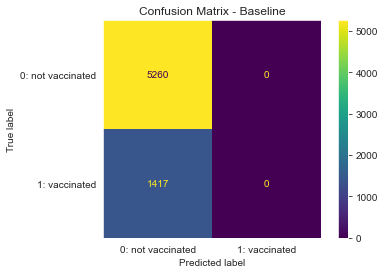

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5260
           1       0.00      0.00      0.00      1417

    accuracy                           0.79      6677
   macro avg       0.39      0.50      0.44      6677
weighted avg       0.62      0.79      0.69      6677



C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [484]:

status_labels = ['0: not vaccinated', '1: vaccinated']
plot_confusion_matrix(baseline_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Baseline')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred0)
print(baseline_classification_report)

The classification reports 78% for true negative and 0% for ture positive test (vaccinated). We are focusing on the True positive, True negative and False Positive when evaluating model because our stake holders foucs on more vaccination.Hence, precision and accuracy are our key metrics for our evaluation. This model is just for model comparison for later.

# Model 1 Logisitc Regression Model

# 

In [485]:
steps = [('preprocess', ct),
            ('logreg',
                       LogisticRegression(random_state=42))]

model1_pipe = Pipeline(steps)

In [486]:
#model1_pipe = Pipeline([('preprocess', ct),
                      #('logreg',
                      #LogisticRegression(random_state=42))])
#model1_pipe


In [487]:
#ct.get_feature_names()

In [488]:
model1_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [489]:
model1_pipe.fit(x_train,y_train)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [490]:
#model1_pipe.named_steps['logreg'].coef_

In [491]:
#df1 = pd.DataFrame(model1_pipe.named_steps['logreg'].coef_.flatten(), index=get_feature_names(ct))

In [492]:
#df1.rename(columns ={'0':'importance'}, inplace = True)
#list(df1)

In [493]:
#ct.get_feature_names()

In [494]:
#df2 = df1.sort_values([0], ascending=False)

In [495]:
#df2 = df2.reset_index()
#df2.rename({'index': 'feature'}, axis=1, inplace=True)

In [496]:
#for i in df2.index:
   # df2.loc[i, 'feature'] = df2.loc[i, 'feature'][9:]

In [497]:
#df2.head(10)

In [498]:
#df2 = df1.sort_values([0], ascending=False)
#ax = df2.head(10).plot(kind='barh')
#ax.set_xlabel("Feature Importance")
#ax.set_ylabel("Feature")
#ax.set_title("Top 10 Features")


In [499]:
y_pred = model1_pipe.predict(x_test)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


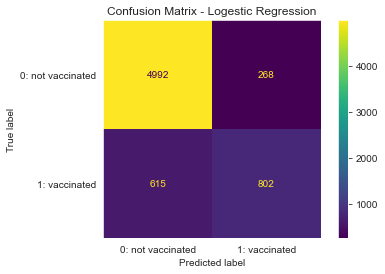

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5260
           1       0.75      0.57      0.64      1417

    accuracy                           0.87      6677
   macro avg       0.82      0.76      0.78      6677
weighted avg       0.86      0.87      0.86      6677



In [500]:
plot_confusion_matrix(model1_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logestic Regression')
plt.show()
logreg_classification_report = classification_report(y_test, y_pred)
print(logreg_classification_report)

In [501]:
print(model1_pipe.score(x_train,y_train))
print(model1_pipe.score(x_test,y_test))

0.8651522715926111
0.867754979781339


In [502]:
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))



Accuracy is :86.7754979781339

AUC is :0.76


In [503]:
model1_pipe.named_steps["preprocess"]

ColumnTransformer(transformers=[('ordinalpipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordenc',
                                                  OrdinalEncoder(categories=[['18 '
                                                                              '- '
                                                                              '34 '
                                                                              'Years',
                                                                              '35 '
                                                                              '- '
                                                                              '44 '
                                                                              'Years',
                                                            

In [504]:
model1_pipe.steps

[('preprocess',
  ColumnTransformer(transformers=[('ordinalpipe',
                                   Pipeline(steps=[('ordimputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('ordenc',
                                                    OrdinalEncoder(categories=[['18 '
                                                                                '- '
                                                                                '34 '
                                                                                'Years',
                                                                                '35 '
                                                                                '- '
                                                                                '44 '
                                                                                'Years',
                    

In [505]:
def get_auc(model, X, y):
    # get y_prob
#     X_trans = ct.transform(X)
    y_prob = model.predict_proba(X)
    score = roc_auc_score(y, y_prob[:,1])
    return round(score,3)

# Let's finetune the logistic regression model

In [506]:
steps =[('preprocess', ct),
                      ('logreg',
                       LogisticRegression(random_state=42))]
model1b_pipe = Pipeline(steps)

pipe_grid = {#'model__penalty': ['l2', 'none'],
             #'model__solver': ['lbfgs'],
             #'model__solver': ['lbfgs', 'liblinear'],
             #'model__C': [0.0001, 0.001, 0.01, 0.1, 1],  
             #'model__max_iter': [1e2, 1e3, 1e4, 1e7]}  
            


In [507]:

gs_pipe = GridSearchCV(estimator=model1b_pipe, 
                     param_grid=pipe_grid)
                     

In [508]:
model1b_pipe.fit(x_train, y_train)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

# Model 2.1 KNN neighbors Classifier.

In [509]:
# let's define a new pipeline object 

steps = [('preprocess', ct),
            ('knn',KNeighborsClassifier())]

model2_pipe = Pipeline(steps)



In [510]:
model2_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [511]:
y_pred2 = model2_pipe.predict(x_test)

In [ ]:
plot_confusion_matrix(model2_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - KNN neighbors')
plt.show()
KNN_classification_report = classification_report(y_test, y_pred2)
print(KNN_classification_report)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


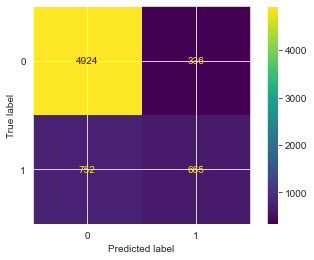

In [512]:
#plot_confusion_matrix(model2_pipe,x_test,y_test)

Accuracy is :83.70525685187958

AUC is :0.7

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


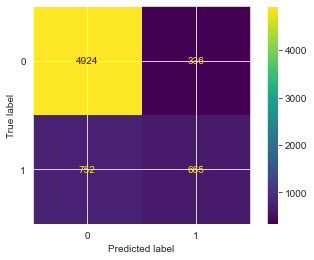

In [513]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred2) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model2_pipe, x_test, y_test)
plt.show()

In [514]:
print(model2_pipe.score(x_train,y_train))
print(model2_pipe.score(x_test,y_test))

0.8806789815277084
0.8370525685187958


In general, the smaller K is, the tighter the "fit" of the model. Remember that with supervised learning, you want to fit a model to the data as closely as possible without overfitting to patterns in the training set that don't generalize. This can happen if your model pays too much attention to every little detail and makes a very complex decision boundary. Conversely, if your model is overly simplistic, then you may have underfit the model, limiting its potential. A visual explanation helps demonstrate this concept in practice:

Running the code below w pipe_grid as the range to tune the knn n_neighbors, knn_p parameter to fine tune the knn model.
It takes a lot of time to run the model, so it get hided out in this notebook ( but feel free to run the model). The best parameter is {'knn__n_neighbors': 15, 'knn__p': 1}. 

In [515]:
#pipe_grid = {
 #            'knn__n_neighbors': [3, 11, 15],
  #           'knn__p': [1, 2, 3, 4]}


In [516]:
#gs_pipe = GridSearchCV(estimator=model2_pipe, 
#                     param_grid=pipe_grid)

In [517]:
#gs_pipe.fit(x_train, y_train);

In [518]:
#gs_pipe.best_params_

Running the code 

{'knn__n_neighbors': 15, 'knn__p': 1}

In [519]:
#gs_pipe.best_score_

In [520]:
#best_model2 = gs_pipe.best_estimator_

In [521]:
#y_pred_b2 = best_model2.predict(x_test)

In [522]:
#plot_confusion_matrix(best_model2,x_test,y_test)

In [523]:
#print(best_model2.score(x_train,y_train))
#print(best_model2.score(x_test,y_test))

In [524]:
# Calculate accuracy 
#acc = accuracy_score(y_test,y_pred3) * 100
#print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_b2)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
#print('\nConfusion Matrix')
#print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(best_model2, x_test, y_test)
#plt.show()

In [525]:
steps = [('preprocess', ct),
            ('knn',KNeighborsClassifier(n_neighbors=15, p= 1 ))]

model2a_pipe = Pipeline(steps)



In [526]:
model2a_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [527]:
y_pred2a = model2a_pipe.predict(x_test)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


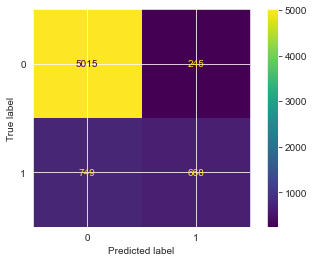

In [528]:
plot_confusion_matrix(model2a_pipe,x_test,y_test)

In [529]:
print(model2a_pipe.score(x_train,y_train))
print(model2a_pipe.score(x_test,y_test))

0.8662006989515726
0.8511307473416205


In [530]:
#knn_best_classification_report = classification_report(y_test, y_pred2a)
#print(knn_best_classification_report)

#  Model 3: Decision Tree

In this classifier, we are using evaulating with decision trees. We will start with default parameters with a random_state = 42. We should expect overfitting on the train set data by default.

In [531]:
steps =[('preprocess', ct),
                      ('dt',
                       DecisionTreeClassifier(random_state = 42))]
model3_pipe = Pipeline(steps)


In [532]:
model3_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [533]:
y_pred3 = model3_pipe.predict(x_test)

Accuracy is :81.11427287704058

AUC is :0.73

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


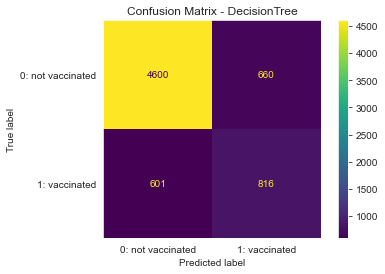

In [534]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred3) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model3_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - DecisionTree')
plt.show()




In [535]:
print(model3_pipe.score(x_train,y_train))
print(model3_pipe.score(x_test,y_test))
dt_classification_report = classification_report(y_test, y_pred3)
print(dt_classification_report)

0.9999500748876685
0.8111427287704058
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5260
           1       0.55      0.58      0.56      1417

    accuracy                           0.81      6677
   macro avg       0.72      0.73      0.72      6677
weighted avg       0.81      0.81      0.81      6677



In [536]:
pipe3_grid = {
            'dt__criterion':['gini','entropy'],
             'dt__max_depth': [30,35,40],
             'dt__min_samples_split': [5,6],
             'dt__min_samples_leaf': [2,3]
                 


}

In [537]:
gs_pipe = GridSearchCV(estimator=model3_pipe, 
                      param_grid=pipe3_grid,
                      cv = 3, 
                        n_jobs=-1
                       )

In [538]:
gs_pipe.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ordinalpipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordenc',
                                                                                          OrdinalEncoder(categories=[['18 '
                                                                                                                      '- '
                                                                                                                      '34 '
                                                                                                                      'Years',
     

# Model 4: AdaBoostClassifier

All the models we've learned so far are Strong Learners -- models with the goal of doing as well as possible on the classification or regression task they are given. The term Weak Learner refers to simple models that do only slightly better than random chance. We also test the Adaboostclassifier with default parameters with random_state = 42).

In [539]:
steps =[('preprocess', ct),
                     ('ab_clf',
                     AdaBoostClassifier(random_state=42))]

model4_pipe = Pipeline(steps)

In [540]:
model4_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [541]:
y_pred4 = model4_pipe.predict(x_test)

In [542]:
adaboost_classification_report = classification_report(y_test, y_pred4)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5260
           1       0.75      0.56      0.64      1417

    accuracy                           0.87      6677
   macro avg       0.82      0.75      0.78      6677
weighted avg       0.86      0.87      0.86      6677



Accuracy is :86.62573011831661

AUC is :0.75

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


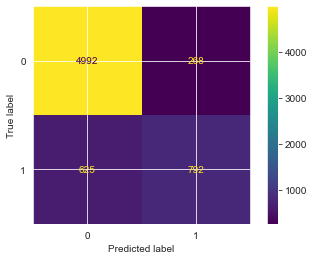

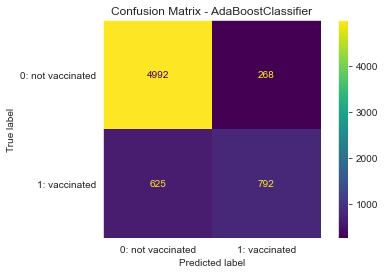

In [543]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred4) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix



plot_confusion_matrix(model4_pipe, x_test, y_test)
plot_confusion_matrix(model4_pipe,x_test,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - AdaBoostClassifier')
plt.show()


In [544]:
print(model4_pipe.score(x_train,y_train))
print(model4_pipe.score(x_test,y_test))

0.8652521218172741
0.8662573011831661


In [545]:
#accuracy_score

In [546]:
import warnings
import sklearn
import pandas as pd
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names